## Installing libraries

In [6]:
# ! pip install jupyter-lab
# ! pip install jupyterlab_sql
# ! jupyter lab build
# ! pip install scrapy
# ! pip install sqlalchemy

In [7]:
# https://github.com/vega/ipyvega/blob/master/notebooks/VegaLite.ipynb

## Importing libs

In [2]:
import requests
from scrapy import Selector
from bs4 import BeautifulSoup as bs
import pandas as pd

#### install chrome extension
* https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb?hl=en

## Jupyter Lab
* https://www.datacamp.com/community/tutorials/sql-interface-within-jupyterlab

# Scrapy

#### Scrapy shell: test selectors

* ! scrapy shell 'http://quotes.toscrape.com'
* ! fetch('http://quotes.toscrape.com')
* ! response.css()

## Selectors

In [9]:
url = 'http://quotes.toscrape.com'

In [10]:
quotes = requests.get(url).content

In [11]:
sel_quotes = Selector(text=quotes)

In [12]:
type(sel_quotes)

scrapy.selector.unified.Selector

In [13]:
# print all the elements
len(sel_quotes.xpath('//*'))

151

In [14]:
# sel.css()
# sel.xpath()

In [15]:
sel_quotes.xpath('//*[contains(concat( " ", @class, " " ), concat( " ", "author", " " ))]//text()').extract()

['Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Jane Austen',
 'Marilyn Monroe',
 'Albert Einstein',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin']

In [16]:
sel_quotes.css('.text::text').extract()

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
 '“Try not to become a man of success. Rather become a man of value.”',
 '“It is better to be hated for what you are than to be loved for what you are not.”',
 "“I have not failed. I've just found 10,000 ways that won't work.”",
 "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”",
 '“A day without sunshine is like, you know, night.”']

### Translate xpath to CSS

In [17]:
# Create the XPath string equivalent to the CSS Locator 
xpath = '/html/body/span[1]//a'

# Create the CSS Locator string equivalent to the XPath
css_locator = 'html > body > span:nth-of-type(1) a'

In [18]:
# Create the XPath string equivalent to the CSS Locator 
xpath = '//div[@id="uid"]/span//h4'

# Create the CSS Locator string equivalent to the XPath
css_locator = 'div#uid > span h4'

### Exemplo

In [19]:
uol_link = 'https://www.uol.com.br/'

In [20]:
uol = requests.get(uol_link).content

In [21]:
uol_sel = Selector(text=uol)

In [22]:
news = uol_sel.css('.color2::text').extract()

### Twitter

In [1]:
twitter_link = 'https://twitter.com/Twitter?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor'

In [5]:
twitter = requests.get(twitter_link).content

In [6]:
tw_sel = Selector(text=twitter)

In [11]:
xpath_selector = '//div/p[@class="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text"]/text()'
        

In [14]:
tweets = tw_sel.xpath(xpath_selector).extract()

In [16]:
len(tweets)

24

In [37]:
likes = tw_sel.css('.r-qvutc0')

In [38]:
likes

[]

## A little bit of text processing

In [23]:
# visualize the most mentioned features

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

def word_cloud_figure(col,
            max_words=None,
            background_color='white',
            stopwords=None):
    string_text = str(col)
    wordCloud = WordCloud(max_words=max_words,
                        repeat=False,
                        stopwords=stopwords,
                        background_color=background_color
                        ).generate(string_text)
    plt.figure(figsize=(10,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    return(plt.show())

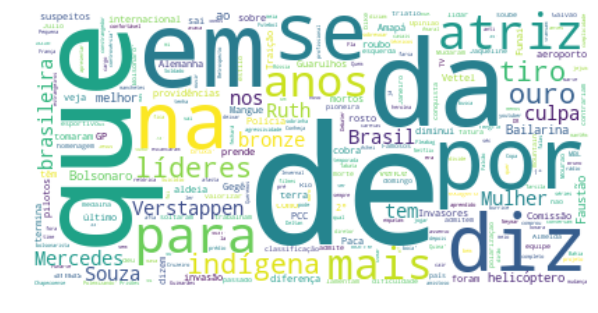

In [24]:
word_cloud_figure(news)

#### pygsheets

In [25]:
import pygsheets
from nltk.corpus import stopwords

def stop_words_gsheet():
    url = '/Users/liviaclarete/gdrive/code/functions/gdocs/googleKey_pesq7/client_secret.json'
    # reading stopwords from a google sheet
    gc = pygsheets.authorize(client_secret=url)
    # Open spreadsheet and then workseet
    sh = gc.open('stopwords_pt')
    wks = sh.sheet1
    # get the values
    stopwords_m = wks.get_all_values(returnas='matrix')
    # create a list with stopwords
    sheet_stopwords = [i[0] for i in stopwords_m]
    # loading nltk stopwords
    stop = stopwords.words('portuguese')
    stopwords_total = stop + sheet_stopwords
    return(stop)

In [26]:
# https://docs.google.com/spreadsheets/d/1GLMt63E9a-EdT-_igqXDvrLb4tf64bW_LTRLSFP2JbQ/edit#gid=1713228162

In [28]:
stwords = stop_words_gsheet()

In [29]:
stwords = stwords + ['do', 'no', 'a', 'o', 'com', 'por', 'em', 'de', 'sobre', 'diz', 'da', 'é', 'como', 'que', 'dentro', 'Após', 'diz', 'Entenda', 'dentro', 'ainda']

In [30]:
stwords[0]

'de'

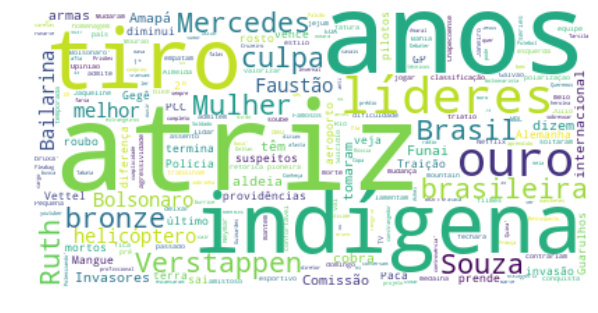

In [31]:
word_cloud_figure(news, stopwords=stwords)

### pre-processing

In [32]:
news_df = pd.DataFrame(news)

In [33]:
news_df.columns = ['news']

In [34]:
stwords = stwords

In [35]:
def pre_processing_col(col, stopwords=stwords):
    # transform the words into lower case
    col = col.apply(lambda x: x.lower())
    # removing punctuation
    col = col.str.replace('[^\w\s]', '')
    # removing numbers
    col = col.apply(
    # iterate through each item in a returns a list of words and joins the split words into a sentence again
    lambda x:' '.join([x for x in x.split() if not x.isdigit()]))
    # stopwords
    # removing stopwords
    col = col.apply(lambda x: ' '.join([x for x in x.split() if x not in stopwords]))
    return(col)

In [36]:
news_df['news_clean'] = pre_processing_col(news_df.news)

In [37]:
from textblob import TextBlob

# tokenize words from the text
def tokenization(col):
    serie = pd.Series(col.apply(lambda x:x.split()))
    return(serie)

In [38]:
news_df['token'] = tokenization(news_df.news_clean)

In [39]:
news_df.head()

,news,news_clean,token
0,"Invasores têm armas e tomaram aldeia no Amapá,...",invasores têm armas tomaram aldeia amapá dizem...,"[invasores, têm, armas, tomaram, aldeia, amapá..."
1,Comissão internacional cobra providências sobr...,comissão internacional cobra providências inva...,"[comissão, internacional, cobra, providências,..."
2,Traição e tiro no rosto: como foram mortos Geg...,traição tiro rosto mortos gegê mangue paca líd...,"[traição, tiro, rosto, mortos, gegê, mangue, p..."
3,Polícia prende 2 suspeitos por roubo de ouro n...,polícia prende suspeitos roubo ouro aeroporto ...,"[polícia, prende, suspeitos, roubo, ouro, aero..."
4,Verstappen vence GP da Alemanha; Vettel sai em...,verstappen vence gp alemanha vettel sai último...,"[verstappen, vence, gp, alemanha, vettel, sai,..."


In [40]:
import gensim
from gensim import corpora


# Creating a term dictionary of the text corpus
dictionary = corpora.Dictionary(news_df.token)

In [41]:
# creating a Document Text Matrix with the dictionary
doc_term_matrix = [dictionary.doc2bow(i) for i in news_df['token'] ]


In [42]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=3, 
                random_state=100)

In [43]:
# Printing the topics
lda_model.print_topics()

[(0,
  '0.011*"bolsonaro" + 0.011*"melhor" + 0.011*"mulher" + 0.010*"ouro" + 0.006*"faustão" + 0.006*"culpa" + 0.006*"bronze" + 0.006*"brasil" + 0.006*"armas" + 0.006*"invasores"'),
 (1,
  '0.009*"tiro" + 0.009*"líderes" + 0.009*"bronze" + 0.009*"brasil" + 0.009*"bolsonaro" + 0.009*"soldado" + 0.009*"mortos" + 0.009*"bike" + 0.009*"1ª" + 0.009*"domingo"'),
 (2,
  '0.017*"atriz" + 0.012*"mercedes" + 0.012*"ruth" + 0.010*"verstappen" + 0.009*"souza" + 0.008*"anos" + 0.007*"culpa" + 0.007*"azar" + 0.007*"helicóptero" + 0.007*"admite"')]

In [44]:
import pyLDAvis
import pyLDAvis.gensim

# Downalod dictionaries from spacy -- lemmatization
# !python -m spacy download en # one time run
# !python -m spacy download pt # one time run

import matplotlib.pyplot as plt
import seaborn as sns

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.069037 -0.038646       1        1  42.057182
2     -0.075134 -0.029944       2        1  34.237968
1      0.006097  0.068590       3        1  23.704845, topic_info=     Category      Freq        Term     Total  loglift  logprob
term                                                           
54    Default  2.000000       atriz  2.000000  30.0000  30.0000
44    Default  1.000000    mercedes  1.000000  29.0000  29.0000
55    Default  1.000000        ruth  1.000000  28.0000  28.0000
218   Default  0.000000     soldado  0.000000  27.0000  27.0000
19    Default  0.000000      mortos  0.000000  26.0000  26.0000
83    Default  0.000000        bike  0.000000  25.0000  25.0000
82    Default  0.000000          1ª  0.000000  24.0000  24.0000
85    Default  0.000000     domingo  0.000000  23.0000  23.0000
212   Default  0.000000      falcão  0.000000  22.0000  22.0000
211   Default  0.000000  apresentar  0.000000  21.0000  21.0000
88    Default  0.000000     medalha  0.000000  20.0000  20.0000
214   Default  0.000000          la  0.000000  19.0000  19.0000
87    Default  0.000000   jaqueline  0.000000  18.0000  18.0000
213   Default  0.000000    invernal  0.000000  17.0000  17.0000
20    Default  0.000000        paca  0.000000  16.0000  16.0000
219   Default  0.000000        time  0.000000  15.0000  15.0000
216   Default  0.000000        novo  0.000000  14.0000  14.0000
217   Default  0.000000        pode  0.000000  13.0000  13.0000
90    Default  0.000000      mourão  0.000000  12.0000  12.0000
89    Default  0.000000    mountain  0.000000  11.0000  11.0000
16    Default  0.000000        gegê  0.000000  10.0000  10.0000
215   Default  0.000000      marvel  0.000000   9.0000   9.0000
18    Default  0.000000      mangue  0.000000   8.0000   8.0000
21    Default  0.000000         pcc  0.000000   7.0000   7.0000
22    Default  0.000000       rosto  0.000000   6.0000   6.0000
234   Default  0.000000       falar  0.000000   5.0000   5.0000
220   Default  0.000000  vingadores  0.000000   4.0000   4.0000
236   Default  0.000000     willian  0.000000   3.0000   3.0000
24    Default  0.000000     traição  0.000000   2.0000   2.0000
205   Default  0.000000    queremos  0.000000   1.0000   1.0000
...       ...       ...         ...       ...      ...      ...
212    Topic3  0.587070      falcão  0.958318   0.9495  -4.7315
211    Topic3  0.587007  apresentar  0.958349   0.9493  -4.7316
88     Topic3  0.586839     medalha  0.958560   0.9488  -4.7319
214    Topic3  0.586486          la  0.958539   0.9482  -4.7325
87     Topic3  0.586362   jaqueline  0.958595   0.9480  -4.7327
213    Topic3  0.586299    invernal  0.958611   0.9478  -4.7328
20     Topic3  0.586122        paca  0.958707   0.9474  -4.7331
219    Topic3  0.586030        time  0.958694   0.9473  -4.7332
216    Topic3  0.585849        novo  0.958679   0.9470  -4.7336
217    Topic3  0.585793        pode  0.958611   0.9470  -4.7337
90     Topic3  0.585793      mourão  0.958686   0.9469  -4.7337
89     Topic3  0.585729    mountain  0.958747   0.9467  -4.7338
16     Topic3  0.585320        gegê  0.958685   0.9461  -4.7345
215    Topic3  0.585309      marvel  0.958781   0.9460  -4.7345
18     Topic3  0.585244      mangue  0.958730   0.9459  -4.7346
21     Topic3  0.585163         pcc  0.958714   0.9458  -4.7347
22     Topic3  0.584787       rosto  0.958774   0.9451  -4.7354
234    Topic3  0.584192       falar  0.959081   0.9437  -4.7364
220    Topic3  0.583433  vingadores  0.959196   0.9423  -4.7377
24     Topic3  0.582948     traição  0.959249   0.9414  -4.7385
236    Topic3  0.583013     willian  0.959462   0.9413  -4.7384
205    Topic3  0.582694    queremos  0.959493   0.9407  -4.7390
231    Topic3  0.582599       casão  0.959537   0.9405  -4.7391
204    Topic3  0.582416       ouvir  0.959359   0.9404  -4.7394
235    Topic3  0.581892         mãe  0.

### Are we allowed to scrape?
https://www.facebook.com/robots.txt

# Let's go to scrapy!

├── scrapy.cfg                # deploy configuration file
└── scrapy_spider             # project's Python module, you'll import your code from here
    ├── __init__.py
    ├── items.py              # project items definition file
    ├── middlewares.py        # project middlewares file
    ├── pipelines.py          # project pipeline file
    ├── settings.py           # project settings file
    └── spiders               # a directory where spiders are located
        ├── __init__.py
        └── example.py        # spider we just created

## Scrapy flow


* create a project
    >scrapy startproject __project_name__

* go to the project's directory
    > cd __project_name__

* create a spider
    > scrapy genspider __spider_name__ __url_to_be_scraped__
    
* Go to the 'spider' folder
    > scrapy genspider __spider_name__ 'www.page.com'
* Modify the file
    >* Open the spider spider_file.py

* scrapy runspider spider_file.py -o file.csv 

## spiders

In [314]:
# -*- coding: utf-8 -*-
import scrapy

class QuotesSpiderSpider(scrapy.Spider):
    name = 'quotes_spider'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        pass

Spider paramethers

* name: identifies the Spider. It must be unique within a project

* start_urls: The list of the feed URLs, the spider would start by crawling the feed URLs.

* allowed_domains: This setting is useful for broad crawls, if the domain of the URL is not in this setting, then the URL would be ignored.

* parse: a method that will be called to handle the response downloaded for each of the requests made.

In [316]:
import scrapy

class QuotesSpiderSpider(scrapy.Spider):
    name = 'quotes_spider'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        quotes = response.xpath("//div[@class='quote']//span[@class='text']/text()").extract()
        yield {'quotes': quotes}

In [328]:
path = '/Users/liviaclarete/Documents/june2019-ft/quotes/quotes/spiders/' 

In [336]:
quotes_1_path = path + 'quotes.csv'

In [337]:
quotes = pd.read_csv(quotes_1, sep=',')

In [338]:
quotes

,quotes
0,“The world as we have created it is a process ...


In [348]:
class QuotesSpiderSpider(scrapy.Spider):
    name = 'quotes_spider'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        quotes = response.xpath("//div[@class='quote']")
        for quote in quotes:
            text = quote.xpath(
                ".//span[@class='text']/text()").extract_first()
            author = quote.xpath(
                ".//small//text()").extract_first()
            yield {'quote': text, "author": author}

In [344]:
quotes_2_path = path + 'quotes_2.csv'

In [345]:
quotes2 = pd.read_csv(quotes_2_path)

In [347]:
quotes2

,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


In [349]:
class QuotesSpiderSpider(scrapy.Spider):
    name = 'quotes_spider'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        quotes = response.xpath("//div[@class='quote']")
        for quote in quotes:
            text = quote.xpath(
                ".//span[@class='text']/text()").extract_first()
            author = quote.xpath(
                ".//small//text()").extract_first()
            yield {'quote': text, "author": author}

        next_page_url = response.xpath("//li[@class='next']//a/@href").extract_first()
        if next_page_url:
            absolute_next_page_url = response.urljoin(next_page_url)
            yield scrapy.Request(absolute_next_page_url)

In [350]:
quotes_3_path = path + 'quotes_3.csv'

In [351]:
quotes3 = pd.read_csv(quotes_3_path)

In [31]:
quotes3.head()

NameError: name 'quotes3' is not defined